In [4]:
DATA_URL='https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx.data'
MODEL_URL='https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx'
!wget $DATA_URL
!wget $MODEL_URL

--2025-12-09 23:32:50--  https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx.data
140.82.112.3thub.com (github.com)... 
connected. to github.com (github.com)|140.82.112.3|:443... 
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/426348925/398ded4a-c41c-4e5a-9672-acb7e441de54?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-09T21%3A31%3A45Z&rscd=attachment%3B+filename%3Dhair_classifier_v1.onnx.data&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-09T20%3A31%3A32Z&ske=2025-12-09T21%3A31%3A45Z&sks=b&skv=2018-11-09&sig=9RoJ9vSr80reczTDkSc7IE3kmV0dgDGs6RJ4rzCf2t8%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTMxNDE2OCwibmJmIjoxNzY1MzEyMzY4LCJwYXRoIjoicmVsZWFzZWFzc2V0c

In [5]:
import onnxruntime as ort

In [35]:
sess = ort.InferenceSession('hair_classifier_v1.onnx')

input_name = sess.get_inputs()[0].name  # 'input'
output_name = sess.get_outputs()[0].name  # 'output'

print("Inputs:")
for input in sess.get_inputs():
    print(f"  Name: {input.name}, Shape: {input.shape}, Type: {input.type}")

print("\nOutputs:")
for output in sess.get_outputs():
    print(f"  Name: {output.name}, Shape: {output.shape}, Type: {output.type}")

Inputs:
  Name: input, Shape: ['s77', 3, 200, 200], Type: tensor(float)

Outputs:
  Name: output, Shape: ['s77', 1], Type: tensor(float)


In [7]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [9]:
'''
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define transformations for both train and test sets
train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # ImageNet normalization
])
'''

'''
Inputs:
  Name: input, Shape: ['s77', 3, 200, 200], Type: tensor(float)
'''

"\nInputs:\n  Name: input, Shape: ['s77', 3, 200, 200], Type: tensor(float)\n"

In [11]:
!wget https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

# Load an image
img = Image.open('yf_dokzqy3vcritme8ggnzqlvwa.jpeg')

# Resize to target size
img = img.resize((200, 200))

--2025-12-10 00:12:16--  https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg
Resolving habrastorage.org (habrastorage.org)... 95.47.173.34, 95.47.173.35, 2a14:b680:0:56::35, ...
connected. to habrastorage.org (habrastorage.org)|95.47.173.34|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 398272 (389K) [image/jpeg]
Saving to: ‘yf_dokzqy3vcritme8ggnzqlvwa.jpeg’

yf_dokzqy3vcritme8g 100%[===================>] 388.94K  --.-KB/s    in 0.1s    

2025-12-10 00:12:16 (2.57 MB/s) - ‘yf_dokzqy3vcritme8ggnzqlvwa.jpeg’ saved [398272/398272]



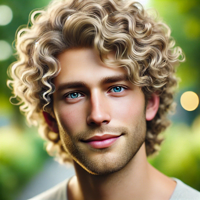

In [12]:
img

In [42]:
import numpy as np

# Convert to numpy array
#x = np.array(img)
x = np.array(img, dtype=np.float32)
print(x.shape)  # (200, 200, 3)

(200, 200, 3)


In [43]:
x_tensor = x.transpose(2, 0, 1) / 255.0  # (3, 200, 200)

#mean = np.array([0.485, 0.456, 0.406]).reshape(3, 1, 1)
#std = np.array([0.229, 0.224, 0.225]).reshape(3, 1, 1)
mean = np.array([0.485, 0.456, 0.406], dtype=np.float32).reshape(3, 1, 1)
std = np.array([0.229, 0.224, 0.225], dtype=np.float32).reshape(3, 1, 1)

x_normalized = (x_tensor - mean) / std

first_pixel_R = x_normalized[0, 0, 0]
print(f"Value of first pixel in R-channel: {first_pixel_R:.4f}")

Value of first pixel in R-channel: -1.0562


In [44]:
x_batch = np.expand_dims(x_normalized, axis=0)  # (1, 3, 200, 200)

In [47]:
output = sess.run([output_name], {input_name: x_batch})

prediction = output[0][0][0]
print(f"Output of the model: {prediction:.4f}")

Output of the model: 0.5216
